In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 1000)
%matplotlib inline

In [13]:
files = {
    'AverageKDTree': 'results/4-',
    'MedianKDTree': 'results/5-',
    'CrackingKDTree': 'results/2-',
    'CrackingKDTreePerDimension': 'results/3-',
    'Quasii': 'results/6-',
    'FullScan':'results/1-',
    'FullScanCandidate': 'results/111-'
}
def read_df(path):
    df = pd.read_csv(path)
    repetitions = df['repetition'].max() + 1
    step = int(len(df.index)/repetitions)
    df_final = df[:step].copy().reset_index()
    for rep in range(1, repetitions):
        df_final += df[step * (rep) : step * (rep + 1)].copy().reset_index()
    return df_final/repetitions


# Cumulative Response Time

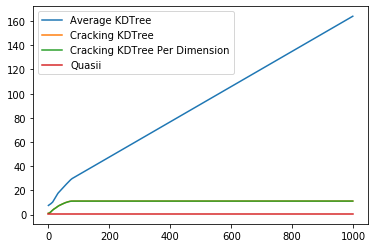

In [16]:
cols="0"
def plot_time(df, name):
    plt.plot((df['initialization_time'] + df['index_search_time'] + df['scan_time'] + df['adaptation_time']).cumsum(), label=name)
plot_time(read_df(files['AverageKDTree'] + cols), 'Average KDTree')
# plot_time(read_df(files['MedianKDTree'] + cols), 'Median KDTree')
plot_time(read_df(files['CrackingKDTree'] + cols), 'Cracking KDTree')
plot_time(read_df(files['CrackingKDTreePerDimension'] + cols), 'Cracking KDTree Per Dimension')
plot_time(read_df(files['Quasii'] + cols), 'Quasii')
# plt.plot(pd.read_csv(files['FullScan'] + cols)['scan_time'].cumsum(), label='Full Scan')
# plt.plot(pd.read_csv(files['FullScanCandidate'] + cols)['scan_time'].cumsum(), label='Full Scan Candidate List')
plt.legend()

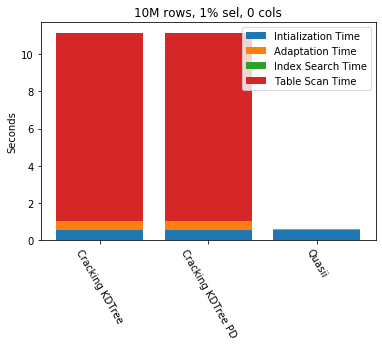

In [12]:
def stack_bar(dfs, names):
    ind = list(range(len(dfs)))
    
    for df in dfs:
        if 'index_search_time' not in df:
            df['index_search_time'] = 0
    
    initializations = np.array([x['initialization_time'].sum() for x in dfs])
    adaptation = np.array([x['adaptation_time'].sum() for x in dfs])
    search = np.array([x['index_search_time'].sum() for x in dfs])
    scan = np.array([x['scan_time'].sum() for x in dfs])
    
    plt.bar(ind, initializations, label='Intialization Time')
    plt.bar(ind, adaptation, bottom=initializations, label='Adaptation Time')
    plt.bar(ind, search, bottom=initializations + adaptation, label='Index Search Time')
    plt.bar(ind, scan, bottom=initializations + adaptation + search, label='Table Scan Time')
    plt.xticks(ind, names, rotation=300)
    plt.ylabel('Seconds')
    plt.legend()
    plt.title(f"10M rows, 1% sel, {cols} cols")
    plt.show()

cols = "0"
stack_bar(
    [
#         read_df(files['AverageKDTree'] + cols),
#         read_df(files['MedianKDTree'] + cols),
        read_df(files['CrackingKDTree'] + cols),
        read_df(files['CrackingKDTreePerDimension'] + cols),
        read_df(files['Quasii'] + cols),
#         read_df(files['FullScan'] + cols),
#         read_df(files['FullScanCandidate'] + cols)
    ],
    [
#         "Average KDTree",
#         "Median KDTree",
        "Cracking KDTree",
        "Cracking KDTree PD",
        "Quasii",
        "Full Scan (BitVector)",
        "Full Scan (Candidate List)"
    ]
)

In [52]:
(read_df(files['CrackingKDTree'] + cols)['adaptation_time'] < read_df(files['CrackingKDTreePerDimension'] + cols)['adaptation_time']).value_counts()

True     747
False    253
Name: adaptation_time, dtype: int64

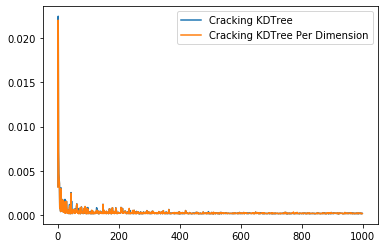

In [20]:
cols=2
# plot_time(pd.read_csv(f'results/results-MedianKDTree-{cols}.csv'), 'Median KDTree')
# plot_time(pd.read_csv(f'results/results-CrackingKDTree-{cols}.csv'), 'Cracking KDTree')
# plot_time(pd.read_csv(f'results/results-CrackingKDTreePerDimension-{cols}.csv'), 'Cracking KDTree Per Dimension')
# plot_time(pd.read_csv(f'results/results-Quasii-{cols}.csv'), 'Quasii')
# plt.plot(pd.read_csv(f'results/results-AverageKDTree-{cols}.csv')['scan_time'], label='Average KDTree')
# plt.plot(pd.read_csv(f'results/results-MedianKDTree-{cols}.csv')['scan_time'], label='Median KDTree')
plt.plot(pd.read_csv(f'results/results-CrackingKDTree-{cols}.csv')['scan_time'], label='Cracking KDTree')
plt.plot(pd.read_csv(f'results/results-CrackingKDTreePerDimension-{cols}.csv')['scan_time'], label='Cracking KDTree Per Dimension')
# plt.plot(pd.read_csv(f'results/results-Quasii-{cols}.csv')['scan_time'], label='Quasii')
# plt.plot(pd.read_csv(f'results/results-FullScan (BitVector)-{cols}.csv')['scan_time'], label='Full Scan')
# plt.plot(pd.read_csv(f'results/results-FullScan (Candidate List)-{cols}.csv')['scan_time'], label='Full Scan Candidate List')
    

plt.legend()

In [10]:
a = pd.read_csv(files['FullScanCandidate'] + '0')
a['result_size'] = a['scan_overhead']

,adaptation_time,initialization_time,scan_overhead,scan_time,tuples_scanned,repetition
0,0.000000,0.512104,27.265638,0.168117,10000000,0
1,0.000000,0.000000,29.642981,0.166992,10000000,0
2,0.000000,0.000000,31.984749,0.166773,10000000,0
3,0.000000,0.000000,31.984749,0.166175,10000000,0
4,0.000000,0.000000,29.206886,0.167218,10000000,0
5,0.000000,0.000000,29.081942,0.166979,10000000,0
6,0.000000,0.000000,31.476830,0.184991,10000000,0
7,0.000000,0.000000,22.598104,0.169147,10000000,0
8,0.000000,0.000000,9.842200,0.181906,10000000,0
9,0.000000,0.000000,7.493218,0.190052,10000000,0
